# Exploratory Data Analysis for Heart Disease Dataset

This notebook provides a comprehensive analysis of the merged heart disease dataset.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set visualization style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# For better visualization in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Loading and Understanding the Data


In [2]:
# Load the dataset
file_path = '../data/cleaned_merged_heart_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1888, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Description

Let's understand what each feature represents:

-   **age**: Age of the patient in years
-   **sex**: Gender (1 = male, 0 = female)
-   **cp**: Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
-   **trestbps**: Resting blood pressure in mm Hg
-   **chol**: Serum cholesterol in mg/dl
-   **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
-   **restecg**: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy)
-   **thalachh**: Maximum heart rate achieved
-   **exang**: Exercise induced angina (1 = yes, 0 = no)
-   **oldpeak**: ST depression induced by exercise relative to rest
-   **slope**: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
-   **ca**: Number of major vessels colored by fluoroscopy (0-3)
-   **thal**: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect, 3 = unknown)
-   **target**: Diagnosis of heart disease (1 = yes, 0 = no)


In [3]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [4]:
# Statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1888.0,54.354343,9.081505,29.0,47.75,55.0,61.0,77.0
sex,1888.0,0.688559,0.463205,0.0,0.00,1.0,1.0,1.0
cp,1888.0,1.279131,1.280877,0.0,0.00,1.0,2.0,4.0
trestbps,1888.0,131.549258,17.556985,94.0,120.00,130.0,140.0,200.0
chol,1888.0,246.855403,51.609329,126.0,211.00,241.0,276.0,564.0
fbs,1888.0,0.148305,0.355496,0.0,0.00,0.0,0.0,1.0
restecg,1888.0,0.597458,0.638820,0.0,0.00,1.0,1.0,2.0
thalachh,1888.0,149.424258,23.006153,71.0,133.00,152.0,166.0,202.0
exang,1888.0,0.331568,0.470901,0.0,0.00,0.0,1.0,1.0
oldpeak,1888.0,1.053761,1.161344,0.0,0.00,0.8,1.6,6.2


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
missing_values[missing_values > 0]

Missing values:


Series([], dtype: int64)

## 2. Data Distribution Analysis


C:\Users\THAI\AppData\Local\Temp\ipykernel_17020\4113616237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


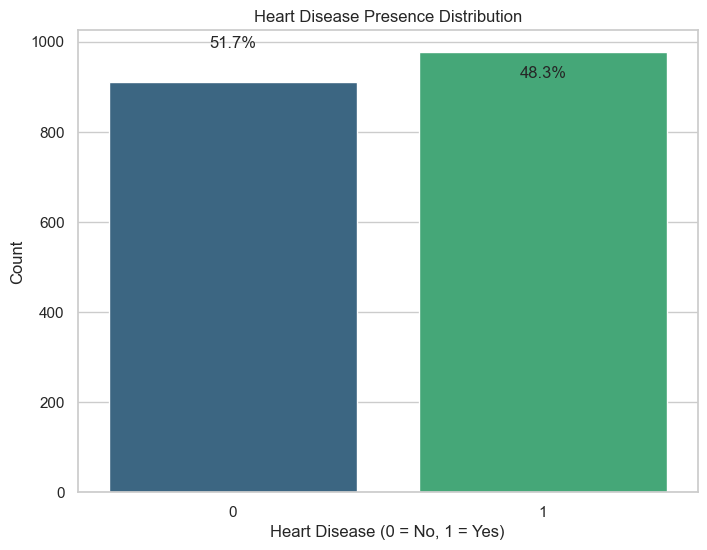

Number of patients with heart disease: 977 (51.7%)
Number of patients without heart disease: 911 (48.3%)


In [6]:
# Distribution of the target variable
plt.figure(figsize=(8, 6))
target_counts = df['target'].value_counts()
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Heart Disease Presence Distribution')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add percentages
for i, count in enumerate(target_counts):
    percentage = 100 * count / len(df)
    plt.text(i, count + 10, f'{percentage:.1f}%', ha='center')

plt.show()

print(f"Number of patients with heart disease: {target_counts[1]} ({100 * target_counts[1] / len(df):.1f}%)")
print(f"Number of patients without heart disease: {target_counts[0]} ({100 * target_counts[0] / len(df):.1f}%)")

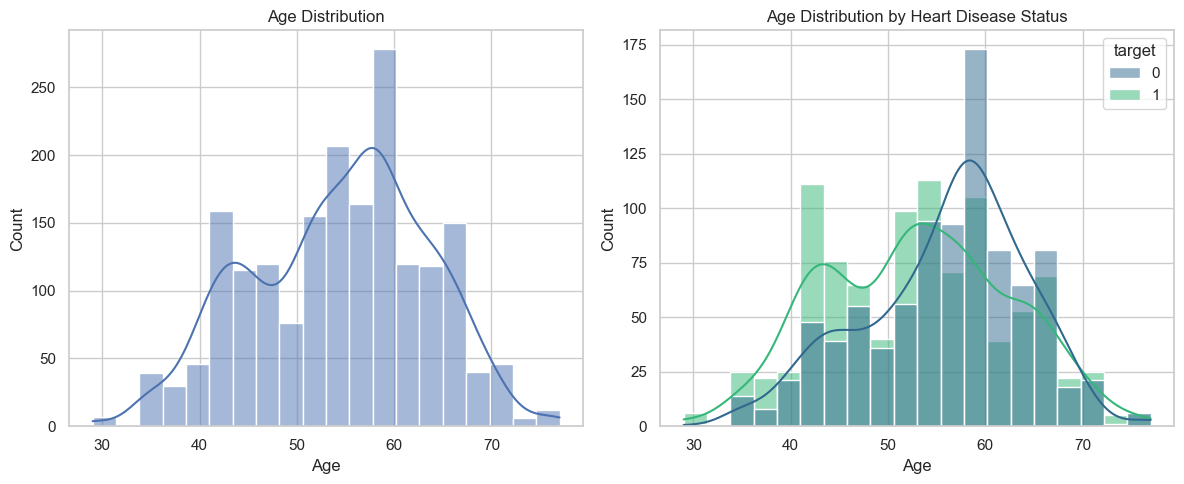

In [7]:
# Age distribution
plt.figure(figsize=(12, 5))

# Overall age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Age distribution by heart disease status
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20, palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\THAI\AppData\Local\Temp\ipykernel_17020\383035174.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='viridis')


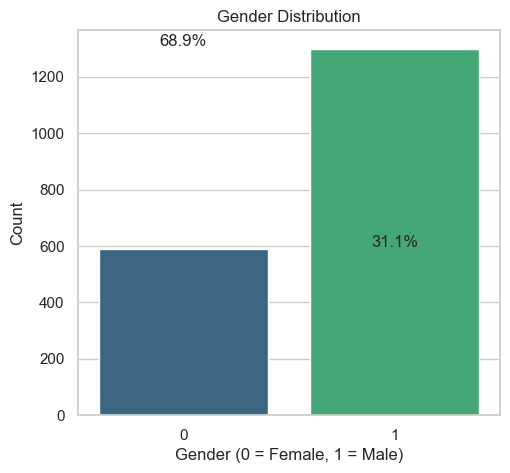

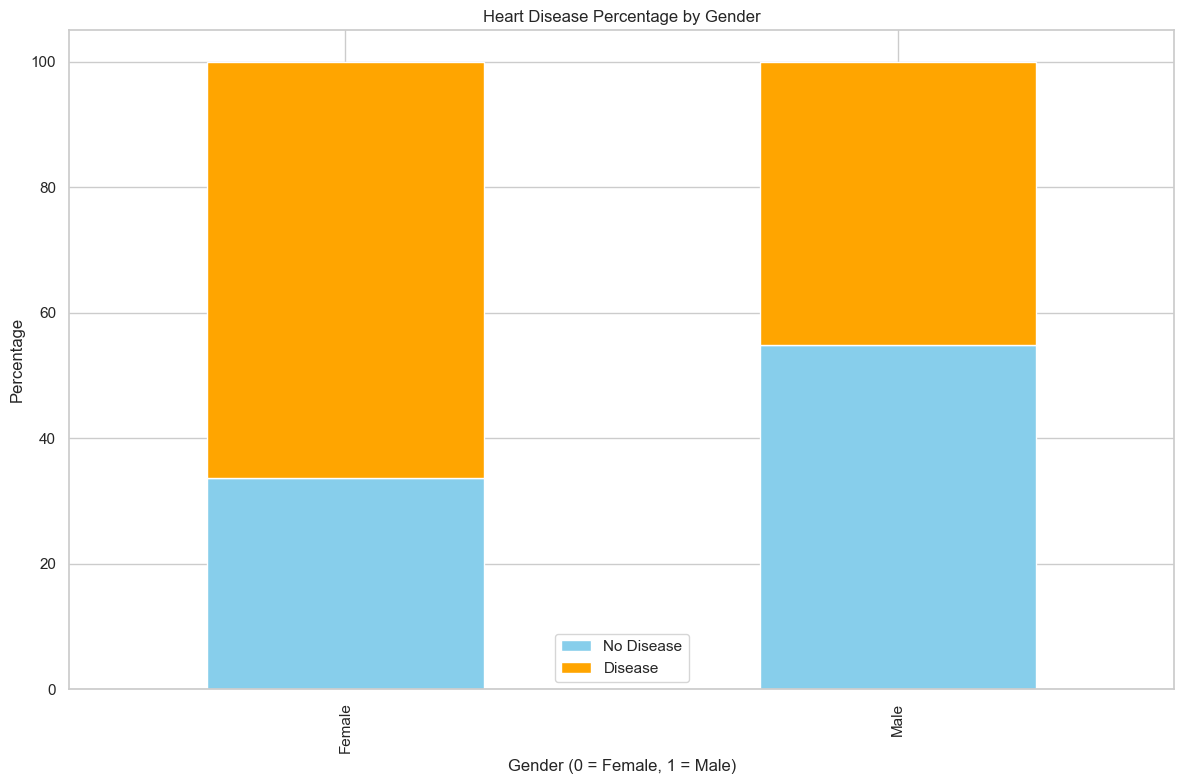

In [21]:
# Gender distribution
plt.figure(figsize=(12, 5))

# Overall gender distribution
plt.subplot(1, 2, 1)
gender_counts = df['sex'].value_counts()
sns.countplot(x='sex', data=df, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')

# Add percentages
for i, count in enumerate(gender_counts):
    percentage = 100 * count / len(df)
    plt.text(i, count + 10, f'{percentage:.1f}%', ha='center')

# Gender distribution by heart disease splt.subplot(1, 2, 2)tatus
gender_disease = pd.crosstab(df['sex'], df['target'])
gender_disease_percentage = gender_disease.div(gender_disease.sum(axis=1), axis=0) * 100
gender_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Heart Disease Percentage by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

C:\Users\THAI\AppData\Local\Temp\ipykernel_17020\412615460.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='viridis', order=sorted(df['cp'].unique()))


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (4).

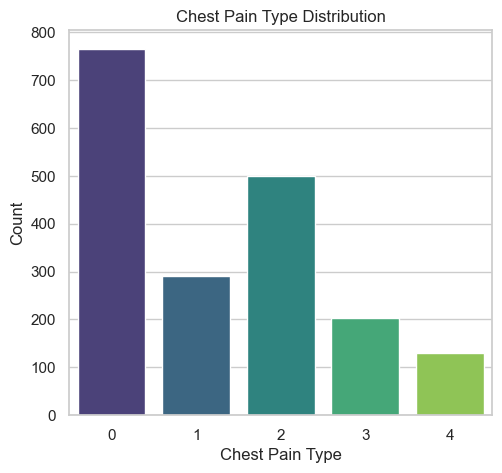

In [9]:
# Chest Pain Type Analysis
plt.figure(figsize=(12, 5))

# Chest pain type distribution
plt.subplot(1, 2, 1)
cp_counts = df['cp'].value_counts().sort_index()
sns.countplot(x='cp', data=df, palette='viridis', order=sorted(df['cp'].unique()))
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=range(len(cp_counts)), labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Chest pain type by heart disease status
plt.subplot(1, 2, 2)
cp_disease = pd.crosstab(df['cp'], df['target'])
cp_disease_percentage = cp_disease.div(cp_disease.sum(axis=1), axis=0) * 100
cp_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Heart Disease Percentage by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(cp_counts)), labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

## 3. Relationship Between Variables


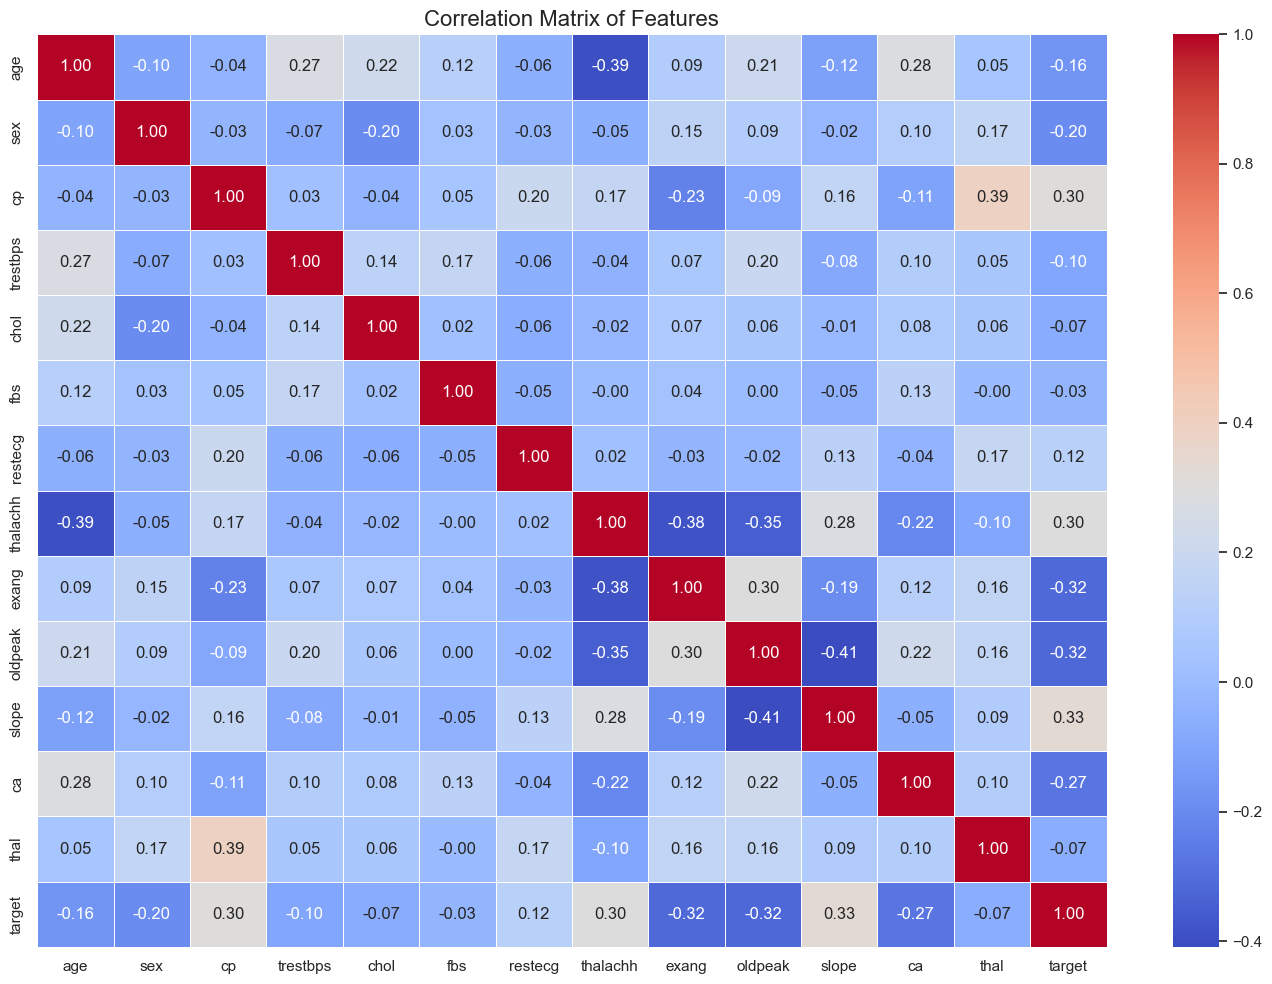

In [10]:
# Correlation analysis
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

In [11]:
# Find the most correlated features with the target variable
target_correlations = correlation_matrix['target'].drop('target').sort_values(ascending=False)
print("Features most correlated with Heart Disease:")
target_correlations

Features most correlated with Heart Disease:


slope       0.333837
cp          0.304025
thalachh    0.298795
restecg     0.123289
fbs        -0.032491
thal       -0.067322
chol       -0.071589
trestbps   -0.095875
age        -0.162303
sex        -0.196214
ca         -0.273105
exang      -0.315084
oldpeak    -0.315629
Name: target, dtype: float64

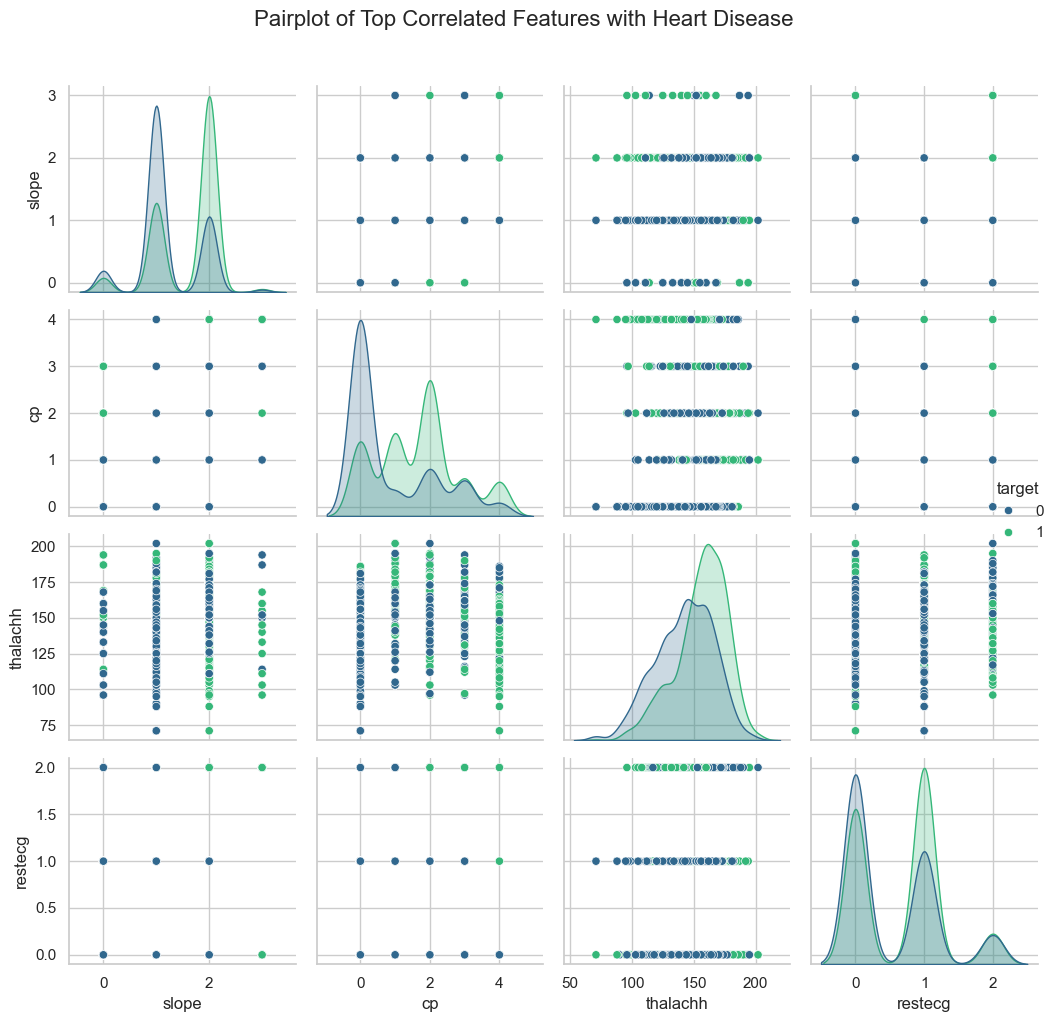

In [12]:
# Pairplot of the most significant features
top_features = target_correlations.head(4).index.tolist()
top_features.append('target')
sns.pairplot(df[top_features], hue='target', palette='viridis')
plt.suptitle('Pairplot of Top Correlated Features with Heart Disease', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## 4. Key Health Indicators Analysis


C:\Users\THAI\AppData\Local\Temp\ipykernel_17020\3520598955.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='viridis')


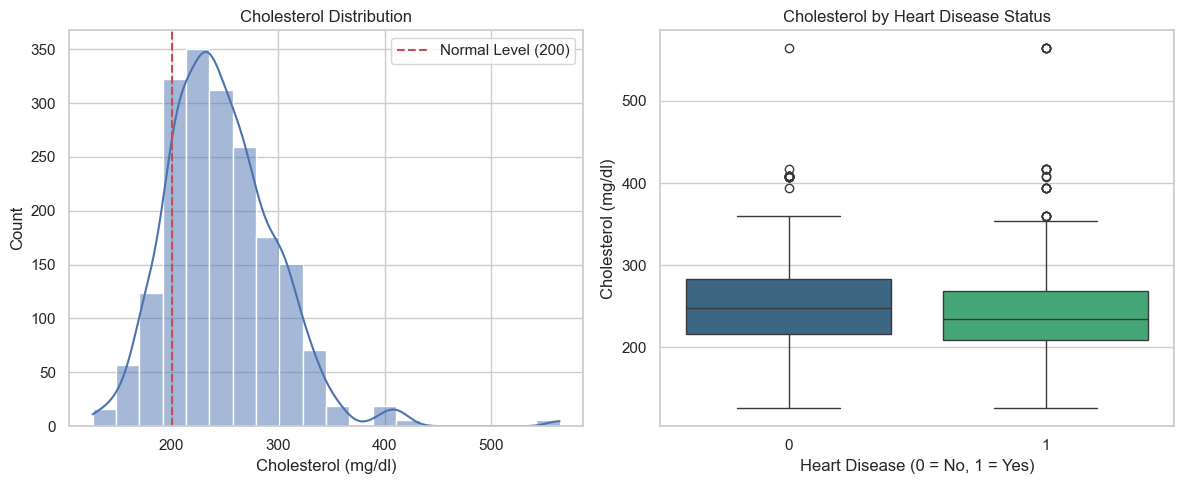

In [13]:
# Cholesterol levels analysis
plt.figure(figsize=(12, 5))

# Cholesterol distribution
plt.subplot(1, 2, 1)
sns.histplot(df['chol'], bins=20, kde=True)
plt.axvline(x=200, color='r', linestyle='--', label='Normal Level (200)')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Count')
plt.legend()

# Cholesterol distribution by heart disease status
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='chol', data=df, palette='viridis')
plt.title('Cholesterol by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.tight_layout()
plt.show()

In [ ]:
# Blood pressure analysis
plt.figure(figsize=(12, 5))

# Resting blood pressure distribution
plt.subplot(1, 2, 1)
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.axvline(x=120, color='r', linestyle='--', label='Normal Level (120)')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.legend()

# Blood pressure distribution by heart disease status
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='trestbps', data=df, palette='viridis')
plt.title('Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.tight_layout()
plt.show()

In [ ]:
# Maximum heart rate analysis
plt.figure(figsize=(12, 5))

# Maximum heart rate distribution
plt.subplot(1, 2, 1)
sns.histplot(df['thalachh'], bins=20, kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Count')

# Maximum heart rate by heart disease status
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='thalachh', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Maximum Heart Rate Achieved')
plt.tight_layout()
plt.show()

## 5. Multivariate Analysis


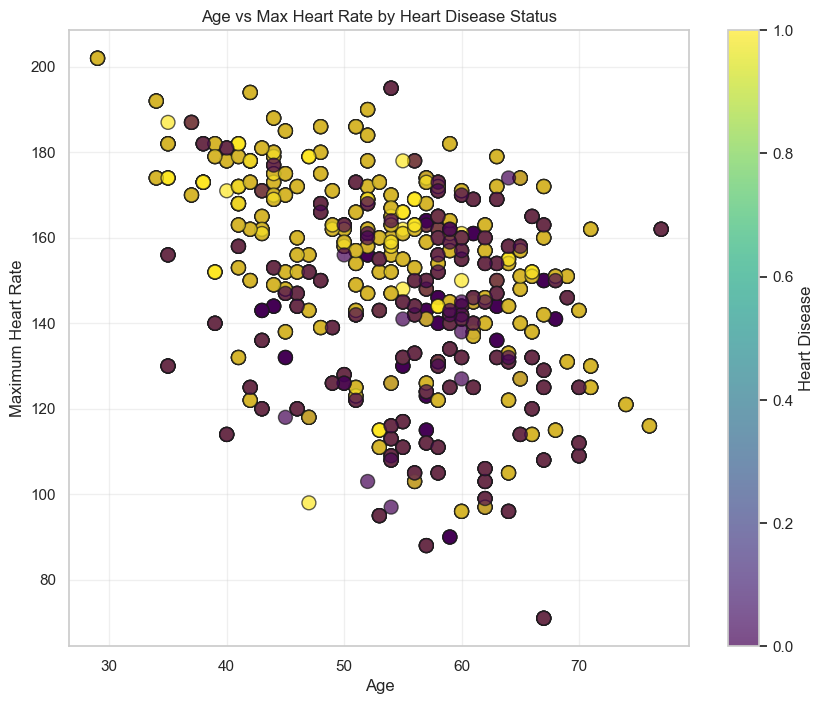

In [14]:
# Age, Max Heart Rate and Heart Disease
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['age'], df['thalachh'], c=df['target'], 
                     cmap='viridis', alpha=0.7, s=100, edgecolor='k')
plt.colorbar(scatter, label='Heart Disease')
plt.title('Age vs Max Heart Rate by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True, alpha=0.3)
plt.show()

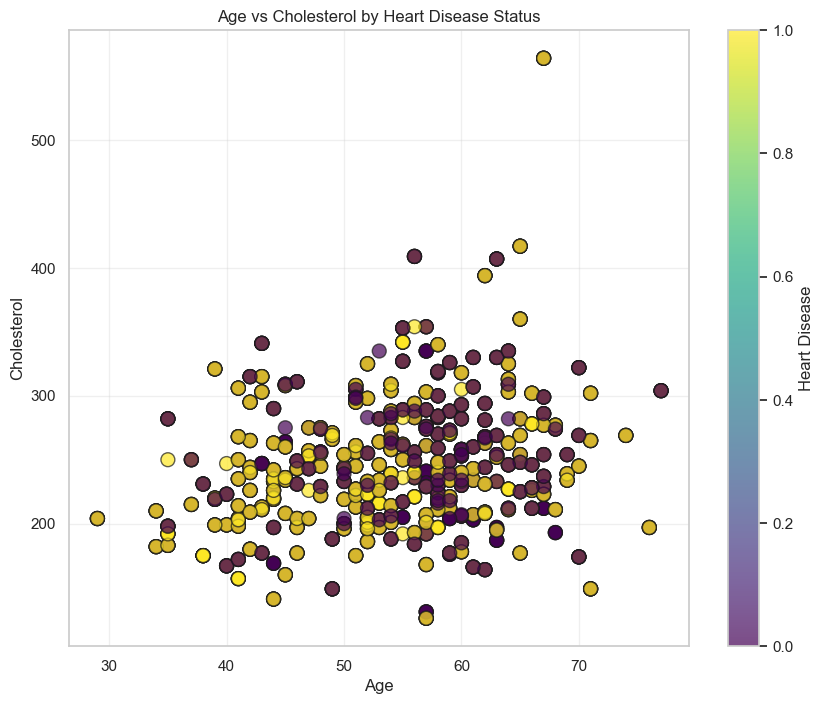

In [15]:
# Age, Cholesterol and Heart Disease
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['age'], df['chol'], c=df['target'], 
                     cmap='viridis', alpha=0.7, s=100, edgecolor='k')
plt.colorbar(scatter, label='Heart Disease')
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True, alpha=0.3)
plt.show()

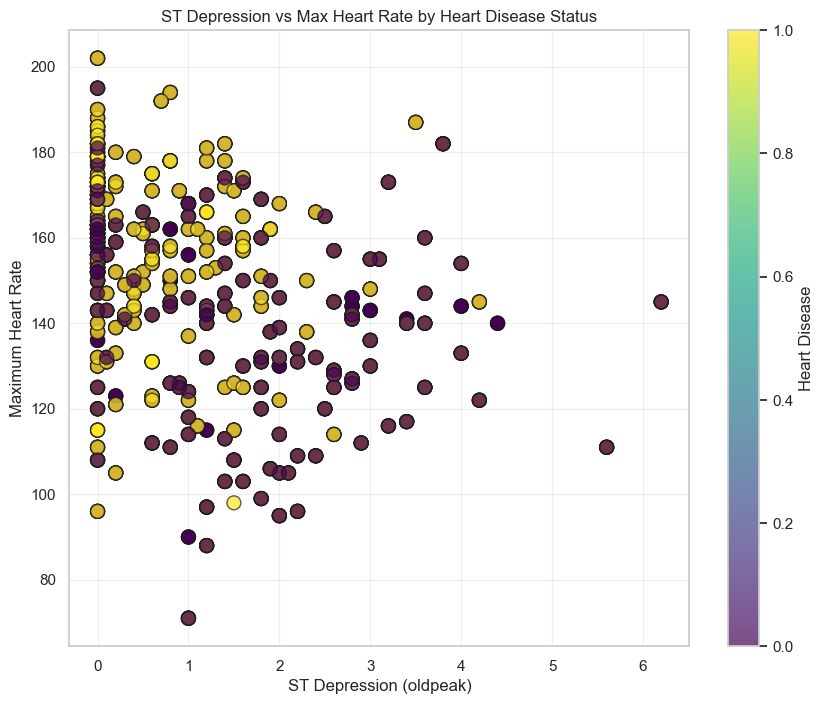

In [16]:
# ST depression, max heart rate and heart disease
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['oldpeak'], df['thalachh'], c=df['target'], 
                     cmap='viridis', alpha=0.7, s=100, edgecolor='k')
plt.colorbar(scatter, label='Heart Disease')
plt.title('ST Depression vs Max Heart Rate by Heart Disease Status')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Maximum Heart Rate')
plt.grid(True, alpha=0.3)
plt.show()

## 6. Age and Gender Analysis


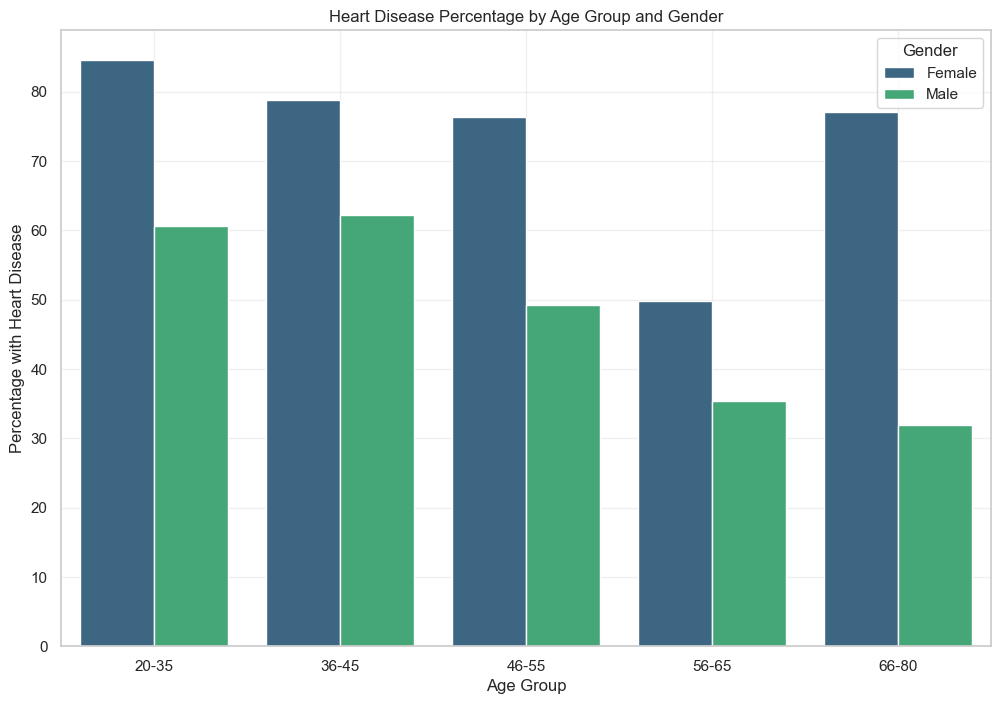

In [17]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[20, 35, 45, 55, 65, 80], 
                         labels=['20-35', '36-45', '46-55', '56-65', '66-80'])

plt.figure(figsize=(12, 8))
age_gender_disease = pd.crosstab([df['age_group'], df['sex']], df['target'])
age_gender_disease_percentage = age_gender_disease.div(age_gender_disease.sum(axis=1), axis=0) * 100

# Reshape for plotting
age_gender_disease_percentage = age_gender_disease_percentage.reset_index()
age_gender_disease_percentage['sex'] = age_gender_disease_percentage['sex'].map({0: 'Female', 1: 'Male'})

# Plot
sns.barplot(data=age_gender_disease_percentage, x='age_group', y=1, hue='sex', palette='viridis')
plt.title('Heart Disease Percentage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage with Heart Disease')
plt.legend(title='Gender')
plt.grid(True, alpha=0.3)
plt.show()

## 7. Risk Factor Analysis


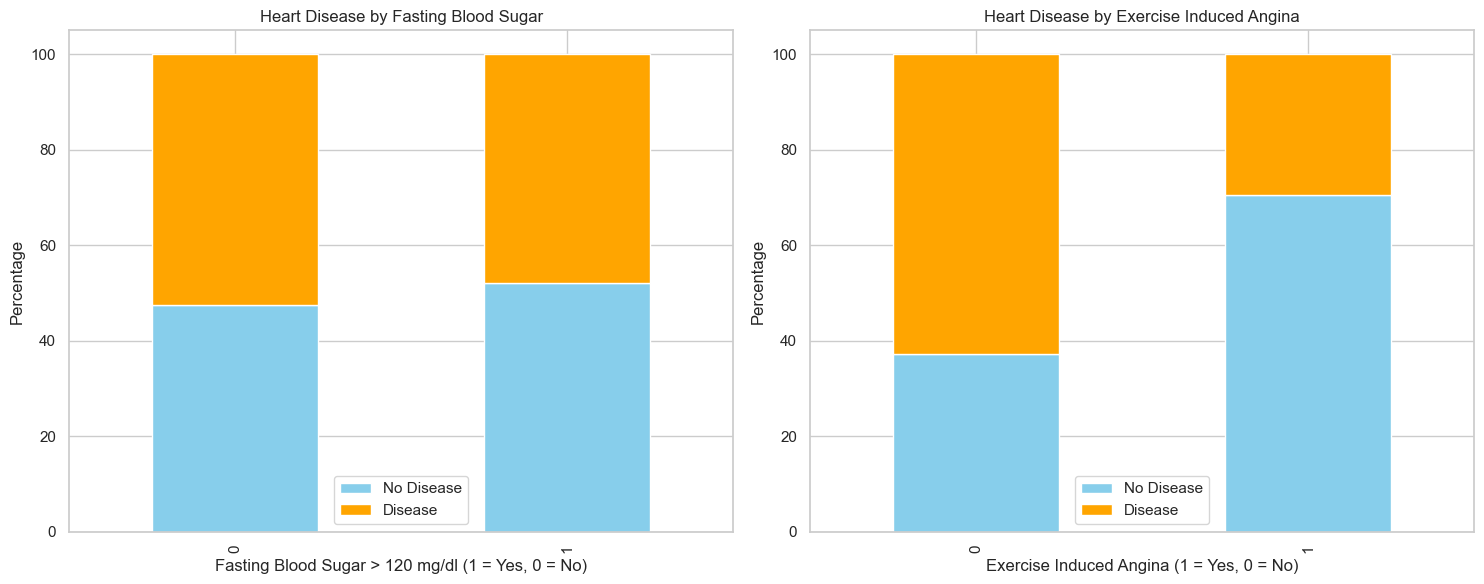

In [18]:
# Risk factors: Fasting blood sugar, Exercise induced angina
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Fasting blood sugar
fbs_disease = pd.crosstab(df['fbs'], df['target'])
fbs_disease_percentage = fbs_disease.div(fbs_disease.sum(axis=1), axis=0) * 100
fbs_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[0])
axes[0].set_title('Heart Disease by Fasting Blood Sugar')
axes[0].set_xlabel('Fasting Blood Sugar > 120 mg/dl (1 = Yes, 0 = No)')
axes[0].set_ylabel('Percentage')
axes[0].legend(['No Disease', 'Disease'])

# Exercise induced angina
exang_disease = pd.crosstab(df['exang'], df['target'])
exang_disease_percentage = exang_disease.div(exang_disease.sum(axis=1), axis=0) * 100
exang_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[1])
axes[1].set_title('Heart Disease by Exercise Induced Angina')
axes[1].set_xlabel('Exercise Induced Angina (1 = Yes, 0 = No)')
axes[1].set_ylabel('Percentage')
axes[1].legend(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (4).

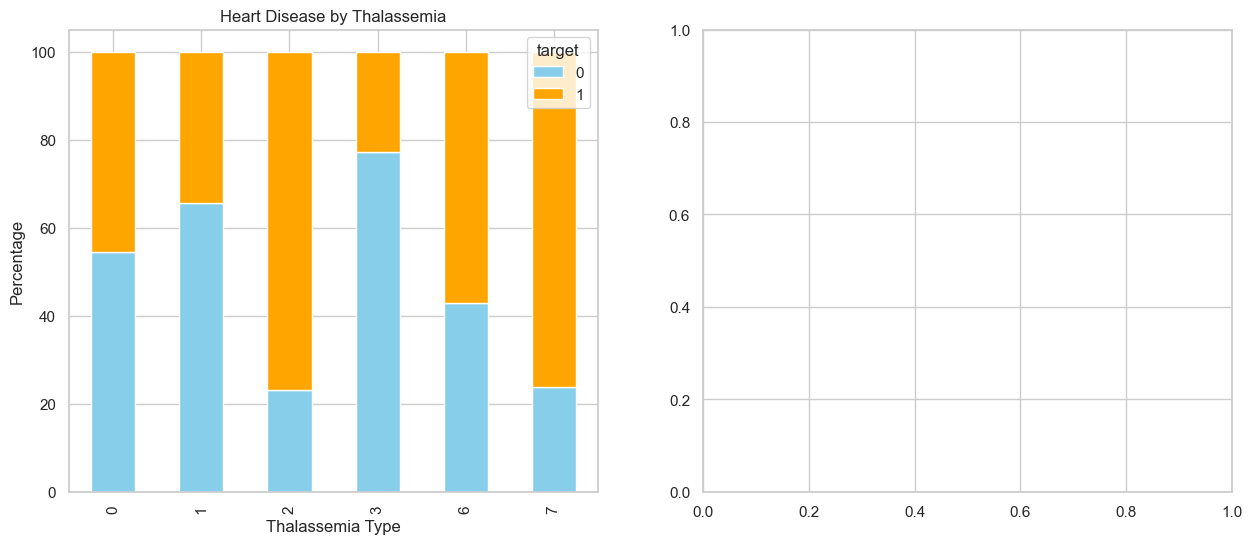

In [19]:
# Analyze thalassemia and number of major vessels
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Thalassemia
thal_disease = pd.crosstab(df['thal'], df['target'])
thal_disease_percentage = thal_disease.div(thal_disease.sum(axis=1), axis=0) * 100
thal_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[0])
axes[0].set_title('Heart Disease by Thalassemia')
axes[0].set_xlabel('Thalassemia Type')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(['Normal', 'Fixed Defect', 'Reversible Defect', 'Unknown'])
axes[0].legend(['No Disease', 'Disease'])

# Number of major vessels
ca_disease = pd.crosstab(df['ca'], df['target'])
ca_disease_percentage = ca_disease.div(ca_disease.sum(axis=1), axis=0) * 100
ca_disease_percentage.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=axes[1])
axes[1].set_title('Heart Disease by Number of Major Vessels')
axes[1].set_xlabel('Number of Major Vessels (0-3)')
axes[1].set_ylabel('Percentage')
axes[1].legend(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

## 8. Key Findings Summary


Based on our exploratory data analysis, we can summarize the following key insights:

1. **Dataset Balance**: The dataset contains information on patients with and without heart disease. This balance is important for further modeling.

2. **Demographic Factors**:

    - Males appear to have a higher prevalence of heart disease compared to females
    - The risk of heart disease generally increases with age
    - There are notable differences in heart disease rates across different age groups and genders

3. **Key Risk Indicators**:

    - Chest pain type shows a strong relationship with heart disease, particularly asymptomatic chest pain
    - Exercise-induced angina is associated with higher rates of heart disease
    - ST depression (oldpeak) shows correlation with heart disease
    - The number of major vessels is strongly associated with heart disease risk
    - Thalassemia types show varying associations with heart disease

4. **Physiological Measurements**:

    - Maximum heart rate tends to be lower in patients with heart disease
    - Cholesterol levels show some differences between patients with and without heart disease
    - Resting blood pressure shows some association with heart disease

5. **Correlation Analysis**:
    - Several features show significant correlation with the target variable
    - There are also correlations between different features that could be important for modeling

These findings can guide further data preprocessing, feature selection, and machine learning model development for heart disease prediction.


In [ ]:
# End of EDA